In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
#Authors: Suvansh and Helen

# Duality

[//]: # "Defining LaTeX commands"
$\newcommand{\norm}[1]{\left\lVert#1\right\rVert}$

We have learned that the Lagrangian dual problem has the property that its optimal value, $d^\ast$, is a lower bound on the optimal value of the primal problem, $p^\ast$. This gap is termed the "duality gap," and allows us to gain information about the primal problem by viewing it from an alternative perspective. Under certain conditions, such as Slater's condition, we find that the duality gap is 0, and the optimal value of the dual problem exactly tells us the optimal value of the primal problem.

For some intuition, let us see strong duality in action.

## Minimum Norm

### The Primal
Consider the following minimization problem, henceforth referred to as the primal problem:
\begin{aligned}
p^\ast = & \min_{x\in\mathbb{R}^n} & \norm{x}_2^2 \\
& \mathrm{s.t.} & Ax=b
\end{aligned}

The Lagrangian is given by
$$\mathcal{L}(x,\nu)=x^\top x+\nu(Ax-b)$$
Allowing us to reformulate the primal problem as
$$p^\ast=\min_x \max_\nu\mathcal{L}(x,\nu)$$
That this reformulation leaves the problem unchanged follows from the following observation:
$$\max_\nu\mathcal{L}(x,\nu)=\begin{cases}x^\top x, & Ax=b \\ +\infty, & \mathrm{otherwise}\end{cases}$$

### The Dual
The **dual function** is given by
$$g(\nu)=\min_x\mathcal{L}(x,\nu)$$
Observe that this objective is concave in $\nu$ by virtue of being the pointwise minimum of affine (and therefore concave) functions of $\nu$.

The **dual problem** is given by swapping the order of the min and max:
$$d^\ast=\max_\nu g(\nu)=\max_\nu\min_x\mathcal{L}(x,\nu)$$
We can solve the inner minimization over $x$ by setting the gradient to 0:
$$\nabla_x\mathcal{L}(x,\nu)=2x+A^\top\nu=0\implies x=-\frac{1}{2}A^\top\nu$$
Note that $\nu$ is a scalar in this case (since there is one constraint), but not in general. We will remain general. Substituting this $x$ back into the Lagrangian, we obtain
$$d^\ast = \max_\nu g(\nu)=\max_\nu-\frac{1}{4}\nu^\top AA^\top\nu - \nu^\top b$$
Since the objective is the sum of two concave functions of $\nu$, we can maximize it by setting the gradient to 0 again:
$$\nabla_\nu-\frac{1}{4}\nu^\top AA^\top\nu - \nu^\top b=-\frac{1}{2}AA^\top\nu-b=0$$

## Implementation

### Scalar case
We will take the scalar case, where $a,x,b\in\mathbb{R}$. We will specify $a=1, b=3$. In this case, our problem becomes:
\begin{aligned}
p^\ast = & \min_{x\in\mathbb{R}} & x^2 \\
& \mathrm{s.t.} & x\leq-3
\end{aligned}


<IPython.core.display.Javascript object>


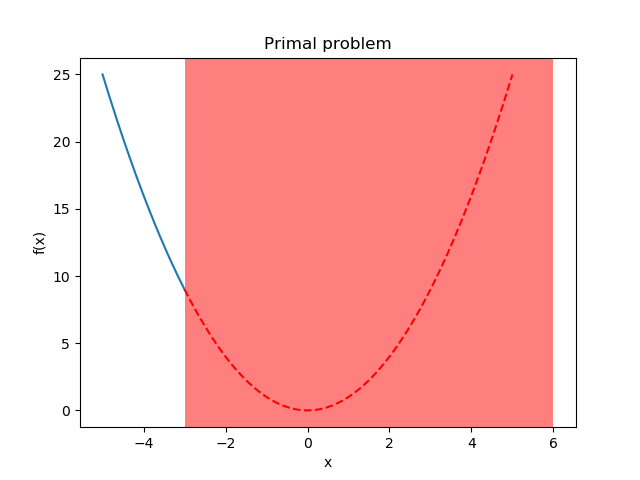

Text(0.5,1,'Primal problem')

In [10]:
# initialize our values. Our constraint reads 1x+3 <= 0, so x <= -3
a, b = (1, -3)
x = np.linspace(-5, -3, 1000)
r = np.linspace(-3, 5, 1000) # points outside of the domain
plt.plot(x, x**2)
plt.plot(r, r**2, linestyle="dashed", color="r")
plt.axvspan(-3, 6, alpha=0.5, facecolor="r")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title('Primal problem')

<IPython.core.display.Javascript object>


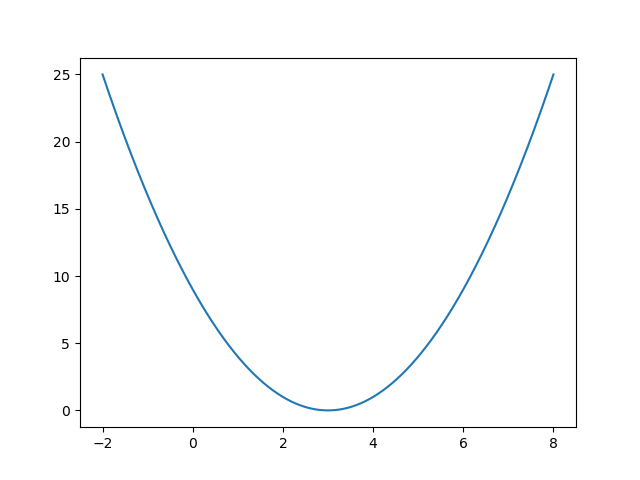

In [11]:
x = np.linspace(-5, 5, 1000)
u = x + 3
t = x**2
plt.figure()
plt.plot(u,t)

We now plot the Lagrangian dual, which reduces in the scalar case to
$$\mathcal{L}(x,\nu)=x^2+\lambda(ax-b).$$
We have that:
\begin{aligned}
x^\ast =& -\frac{1}{2}a\lambda \\
d^\ast =& \max_{\lambda \geq 0} -\frac{1}{4}a^2 \lambda^2 - b\lambda.
\end{aligned}
Note that since we are dealing with an inequality constraint, our dual variable $\lambda$ is restricted to non-negative values.
Optimizing by setting gradient to $0$, we get
$$-\frac{1}{2}a^2\lambda^\ast - b=0\implies\lambda^\ast=-\frac{2b}{a^2}.$$
However, this violates the non-negativity constraint on $\lambda$. Since $d^\ast$ is a quadratic function with a negative leading coefficient and is minimized when $\lambda$ is negative, we know that the optimal $\lambda^\ast$ is then at the boundary $\lambda = 0$. This gives us:
$$d^\ast=0 = p^\ast$$
as desired.

<IPython.core.display.Javascript object>


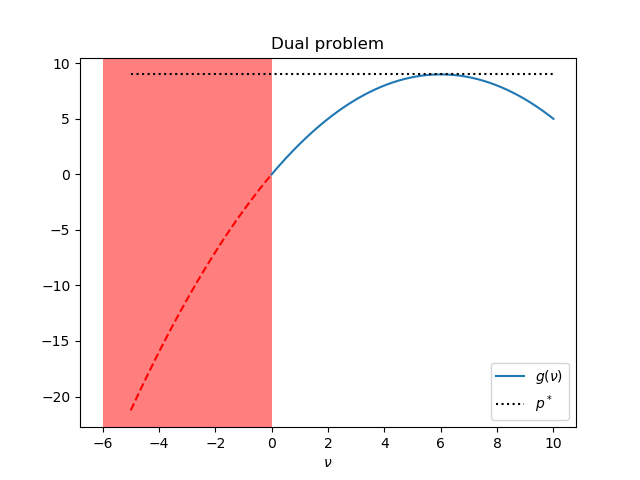

In [12]:
lbda = np.linspace(0, 10, 1000)
q = np.linspace(-5, 0, 1000) # points outside of the domain
d = np.linspace(-5, 10, 1000)

def g(nu):
    return -1/4 * a**2 * nu**2 - b * nu

plt.figure()
plt.plot(lbda, g(lbda), label=r'$g(\nu)$')
plt.plot(q, g(q), linestyle="dashed", color="r")
plt.plot(d, [9 for _ in d], color="k", linestyle="dotted", label=r'$p^*$')
plt.axvspan(-6, 0, alpha=0.5, facecolor="r")
plt.xlabel(r'$\nu$')
# plt.ylabel(r'$g(\lambda)$')
plt.title('Dual problem')
plt.legend()

### $x \in \mathbb{R}^2$ case

Let's go back to the minimum norm problem with an equality constraint.

For this example, let $a = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$, $b = 3$.

The primal problem is:
\begin{aligned}
p^\ast = & \min_{x\in\mathbb{R}^n} & \norm{x}_2^2 \\
& \mathrm{s.t.} & a^\top x=b
\end{aligned}
In other words, we are interested in the point on the hyperplane defined by $a^\top x = b$ that minimizes $\|x\|_2^2$. We can find $p^\ast$ by substituting the constraint $a^\top x = b$ into our objective and differentiating:
\begin{aligned}
a^\top x =& x_1 + 2x_2 = 3 \implies x_1 = 3 - 2x_2 \\
\|x\|_2^2 =& (3 - 2x_2)^2 + x_2^2 \\
\frac{\partial}{\partial x_2} \|x\|_2^2 =& 10 x_2 - 12 \\
\implies x_2^\ast =& \frac{6}{5}, x_1^\ast = \frac{3}{5} \\
\implies p^\ast =& \|x^\ast\|_2^2 = \frac{9}{5}.
\end{aligned}

In [13]:
b = 3
a = np.array([1,2]) # normal vector of the plane defined by the equality constraint

# Primal problem
def f(x_1, x_2):
    return x_1 ** 2 + x_2 ** 2

x_1 = np.linspace(-10, 10, 30)
x_2 = np.linspace(-10, 10, 30)
X_1, X_2 = np.meshgrid(x_1, x_2)
#Z = f(X, Y)
Z = f(X_1, X_2)


<IPython.core.display.Javascript object>


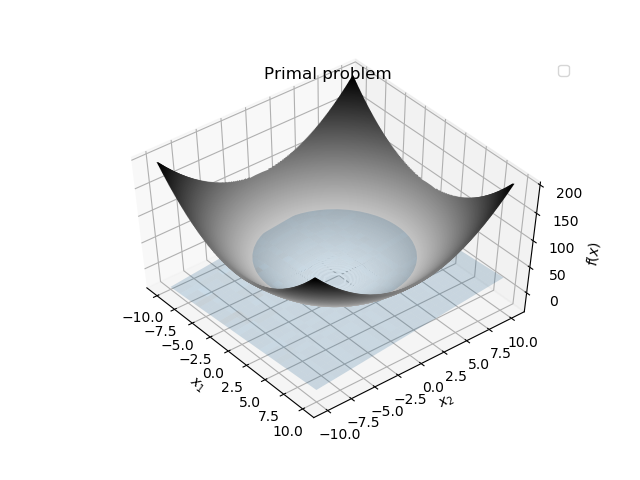

No handles with labels found to put in legend.


In [14]:
constraint_z = a[0] * X_1 + a[1] * X_2 - b
plt3d = plt.figure().gca(projection='3d')

plt3d.plot_surface(X_1, X_2, constraint_z, alpha=.2)

ax = plt.gca()
ax.contour3D(X_1, X_2, Z, 200, cmap='binary')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$f(x)$')
plt.title('Primal problem')
plt.legend()
plt.show()

We will now show that $p^\ast = d^\ast$. Our dual problem is:
$$d^\ast=\max_\nu\min_x\mathcal{L}(x,\nu) = x^\top x+\nu(a^\top x-b)$$
Setting the gradient with respect to $x$ to 0:
$$\nabla_x\mathcal{L}(x,\nu)=2x+a\nu=0\implies x=-\frac{1}{2}a\nu$$
This gives us:
$$d^\ast = \max_\nu g(\nu)=\max_\nu-\frac{1}{4}a^\top a \nu^2 - \nu b$$
Which is minimized at:
\begin{aligned}
-\frac{1}{2}a^\top a\nu^\ast - b =& 0 \implies\nu^\ast = -\frac{2b}{a^\top a} \\
\implies d^\ast =& \frac{b^2}{a^\top a} = \frac{9}{5} \\
=& p^\ast.
\end{aligned}

<IPython.core.display.Javascript object>


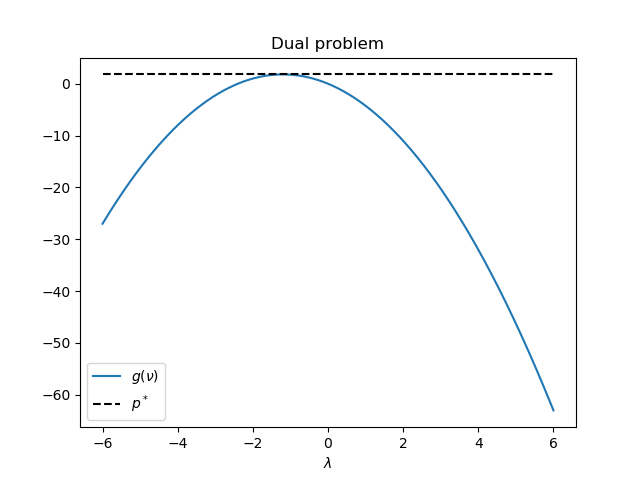

In [15]:
# Dual problem
v = np.linspace(-6, 6, 1000)
plt.figure()
plt.plot(v, [-1/4 * np.dot(a,a) * w**2 - b * w for w in v], label=r'$g(\nu)$')
plt.plot(v, [b**2/np.dot(a,a) for i in v], color="k", linestyle="dashed", label=r'$p^*$')
plt.xlabel(r'$\lambda$')
plt.title('Dual problem')
plt.legend()